# Handwritten digits prediction using PyTorch

## Load MNIST data

In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

## Build the Neural Net

In [4]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

#calculate loss
criterion = nn.NLLLoss()


#optimizer, learning rate=0.003
optimizer = optim.SGD(model.parameters(), lr=0.003)



## Train MNIST data

In [5]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        
        #clear the gradients
        optimizer.zero_grad()
        #forward pass, and then backward pass
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        
        #update step(weights)
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8536570158594452
Training loss: 0.8292630832396082
Training loss: 0.5351216520772559
Training loss: 0.4415201172868072
Training loss: 0.39439591679618813


## See Prediction

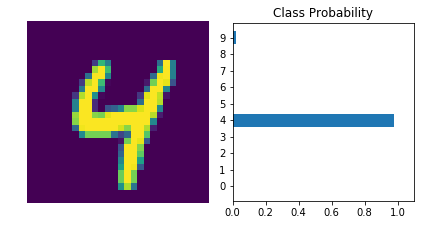

In [7]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)